<font color='green' size = 5> Trace Estimation: 1 Clean Qubit and n Mixed Qubits</font>

Certain noisy quantum systems (such as nuclear magnetic resonance quantum computers) involve highly mixed quantum states. Deterministic quantum computation with 1 clean qubit (DCQ1) algorithms aim to extract useful information from such noisy systems. This code implements a DCQ1 based unitary trace estimation algorithm using 1 clean qubit and n mixed qubits via the following circuit:

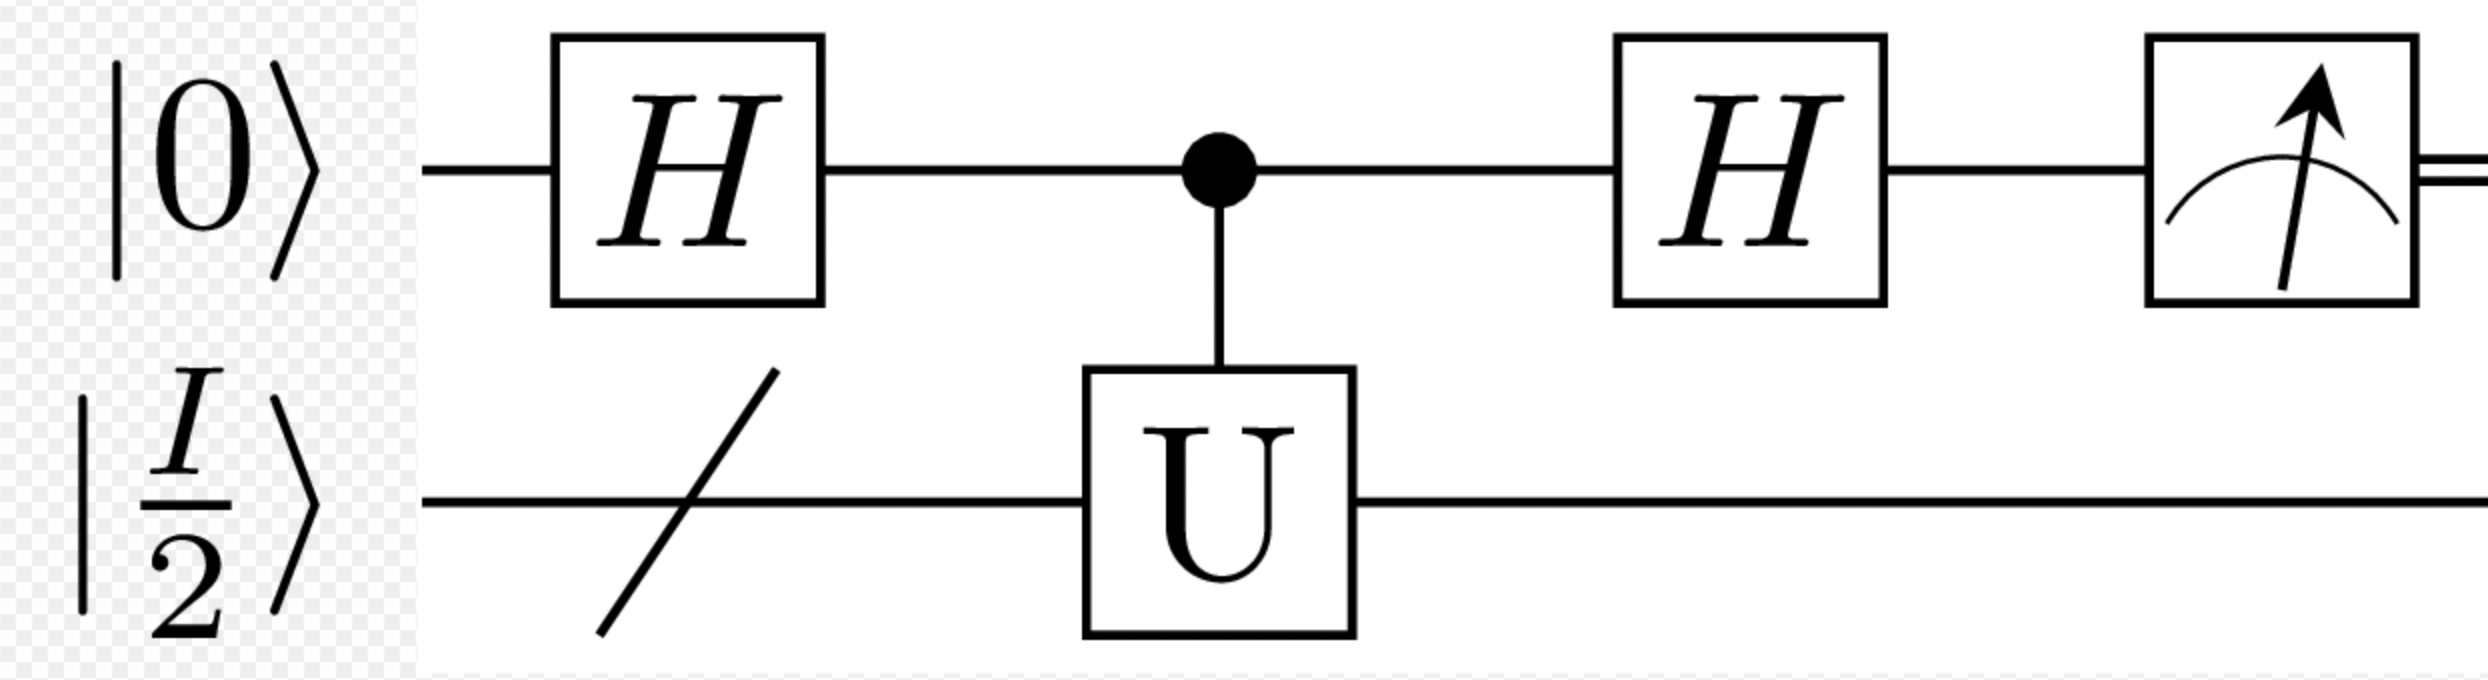


Resources: https://en.wikipedia.org/wiki/One_Clean_Qubit


In [1]:
# Import required packages and libraries

from qiskit import *
from qiskit.visualization import *
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab as P
import random
import cmath
import qiskit.quantum_info as qi
from qiskit.quantum_info.operators import Operator, Pauli
from mpl_toolkits.mplot3d import Axes3D

In [2]:

# This function estimates the real part of the trace of a unitary operator U(theta)
# It uses theta to create the unitary, and it uses an arbitrary number of mixed qubits and trials 

def estimaterealpart(nummixed, theta, numtrials):
    
    zerocounter = 0;
    
    for i in range(0,numtrials):
        qpe = QuantumCircuit(nummixed+1,1); qpe.h(0)

        a = random.randint(1, (2**nummixed))-1;
        abin = format(a, "b");
        digits = [int(i) for i in str(abin)];
        k = 1;
        for i in reversed(digits):
            if i>0:
                qpe.x(k)
            k = k+1;

        for i in range(1,nummixed+1):
            qpe.cp(theta,0,i)   

        qpe.h(0)
        qpe.measure(0,0)

        simulator = Aer.get_backend('aer_simulator'); 
        shots = 1; t_qpe = transpile(qpe, simulator); 
        qobj = assemble(t_qpe, shots=shots)
        results = simulator.run(qobj).result(); 
        answer = results.get_counts()

        res = list(answer)[0];
        if int(res) == 0:
            zerocounter = zerocounter+1;
    
    p0 = zerocounter/numtrials   
    Retrace = (p0-(0.5))*(2**(nummixed+1))
    return Retrace;
    
# This creates a vector of estimates

    
def estimatevec(nummixed, numberofangles, numtrials):
    theta = thetavec(numberofangles);
    estimates = [];
    for i in theta:
        estimate = estimaterealpart(nummixed, i, numtrials);
        estimates.append(estimate);
    return estimates;
    
# This creates a vector of actual values

def actualvec(nummixed, numberofangles, numtrials):
    theta = thetavec(numberofangles);
    actuals = [];
    for i in theta:
        a = np.array([[1, 0],[0, (cmath.exp(i*1j))]]); b = a;
        if nummixed > 1:
            for j in range(1,nummixed):
                b = np.tensordot(b, a, 0)
        c=b;   
        for k in range(1,nummixed+1):
            c = np.trace(c)
        actual = (c).real;
        actuals.append(actual);
    return actuals;
    
# This creates a vector of angles which can be used to make different unitaries

def thetavec(numberofangles):
    theta = np.linspace(0.0, 2.0, num=numberofangles)*(math.pi);
    return theta

# This generates the final plot

def generateplot (nummixed, numberofangles, numtrials):
    est = estimatevec(nummixed, numberofangles, numtrials);
    act = actualvec(nummixed, numberofangles, numtrials);
    theta = thetavec(numberofangles);
    plt.plot(theta, act, 'rs--',label = "exact")
    plt.plot(theta, est, 'bs',label = "estimate")
    plt.legend(loc="upper center")
    plt.ylabel('Re [trace]')
    plt.xlabel('theta')
    plt.show()

<font color='green' size = 5>Simulation Results:</font>

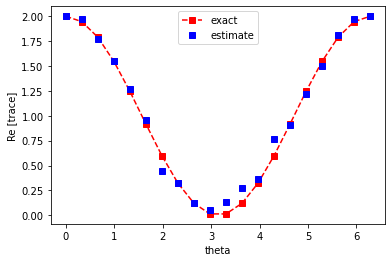

In [3]:
# 500 trials, 1 mixed qubit, and 1 clean qubit
# 20 different unitaries U(theta) are used
# The plot shows the exact and estimated values for the real part of the trace of U(theta)
# Strong agreement is observed

numtrials = 500; numberofangles = 20; nummixed = 1;
generateplot (nummixed, numberofangles, numtrials)

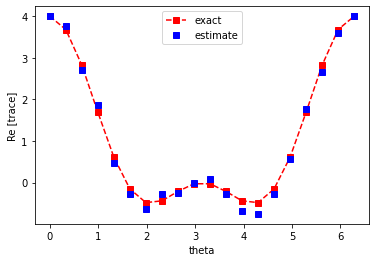

In [4]:
# 500 trials, 2 mixed qubit, and 1 clean qubit
# 20 different unitaries U(theta) are used
# The plot shows the exact and estimated values for the real part of the trace of U(theta)
# Strong agreement is observed

numtrials = 500; numberofangles = 20; nummixed = 2;
generateplot (nummixed, numberofangles, numtrials)

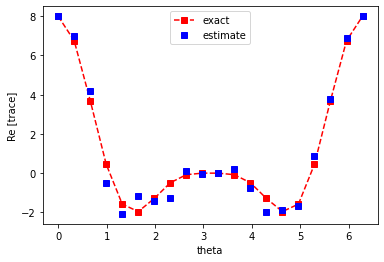

In [5]:
# 500 trials, 1 mixed qubit, and 3 clean qubit
# 20 different unitaries U(theta) are used
# The plot shows the exact and estimated values for the real part of the trace of U(theta)
# Strong agreement is observed

numtrials = 500; numberofangles = 20; nummixed = 3;
generateplot (nummixed, numberofangles, numtrials)

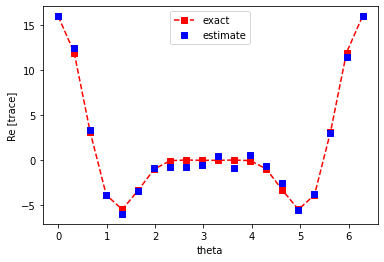

In [6]:
# 500 trials, 1 mixed qubit, and 4 clean qubit
# 20 different unitaries U(theta) are used
# The plot shows the exact and estimated values for the real part of the trace of U(theta)
# Strong agreement is observed

numtrials = 500; numberofangles = 20; nummixed = 4;
generateplot (nummixed, numberofangles, numtrials)